<a href="https://colab.research.google.com/github/Deb052024/LLM-Project-Building-a-News-Research-Tool-/blob/main/Sentiment_Analysis_Amazon_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from typing_extensions import LiteralString
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [5]:
df=pd.read_csv('/content/train_data.csv')
df1=pd.read_csv('/content/test_data.csv')

In [6]:
df.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [7]:
df.isnull().sum()

,0
Name of the product,0
Product Brand,0
categories,0
primaryCategories,0
reviews.date,0
reviews.text,0
reviews.title,10
sentiment,0


In [8]:
# prompt: based on the sentiment of the review.stext fill the respective reviews.title filed with null values , use vader sentiment analyzer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if you haven't already
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df['sentiment_score'] = df['reviews.text'].apply(analyze_sentiment)

# Fill 'reviews.title' with null values based on sentiment
df.loc[df['sentiment_score'] <= 0, 'reviews.title'] = np.nan  # Negative or neutral sentiment

# You can adjust the threshold (0 in this case) for positive/negative sentiment as needed.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
df.isnull().sum()

,0
Name of the product,0
Product Brand,0
categories,0
primaryCategories,0
reviews.date,0
reviews.text,0
reviews.title,380
sentiment,0
sentiment_score,0


In [10]:
# prompt: based on the sentiment score of the review.text, fill the null values of review.title

# Fill NaN values in 'reviews.title' based on sentiment score
df['reviews.title'] = df.apply(lambda row: "Negative Review" if pd.isnull(row['reviews.title']) and row['sentiment_score'] < 0 else row['reviews.title'], axis=1)
df['reviews.title'] = df.apply(lambda row: "Positive Review" if pd.isnull(row['reviews.title']) and row['sentiment_score'] >= 0 else row['reviews.title'], axis=1)

df.isnull().sum()


,0
Name of the product,0
Product Brand,0
categories,0
primaryCategories,0
reviews.date,0
reviews.text,0
reviews.title,0
sentiment,0
sentiment_score,0


In [11]:
df.columns

Index(['Name of the product', 'Product Brand', 'categories',
       'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title',
       'sentiment', 'sentiment_score'],
      dtype='object')

sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64
sentiment
Positive    93.72
Neutral      3.95
Negative     2.33
Name: proportion, dtype: float64


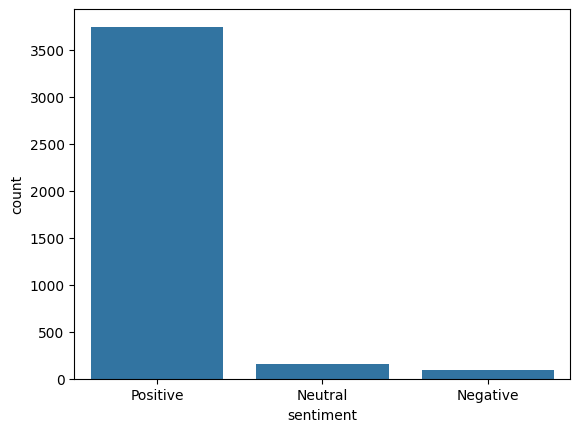

In [12]:
sns.countplot(x='sentiment',data=df)
class_counts =df['sentiment'].value_counts()
print(class_counts)

# Calculate and print the percentage of each class
class_percentages = (df['sentiment'].value_counts(normalize=True) * 100).round(2)
print(class_percentages)


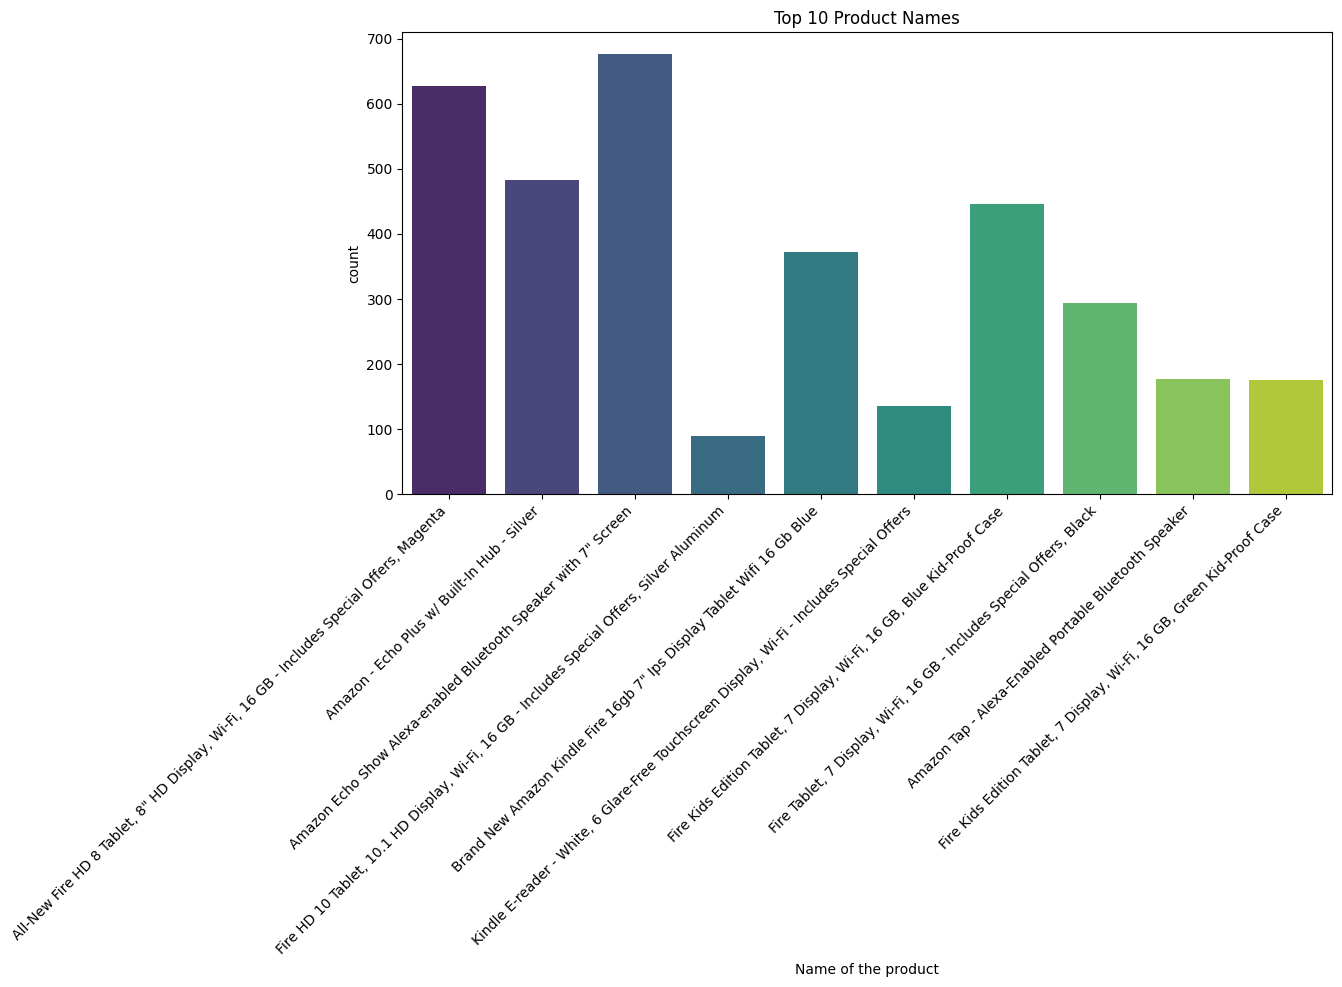

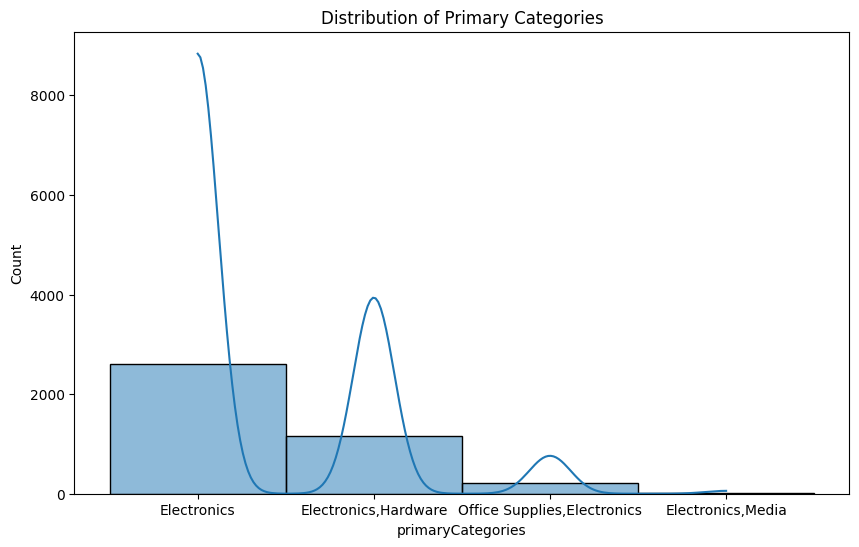

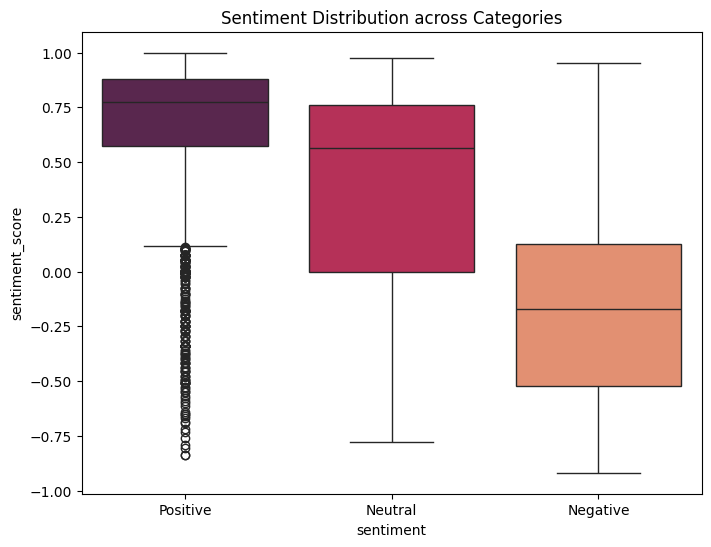

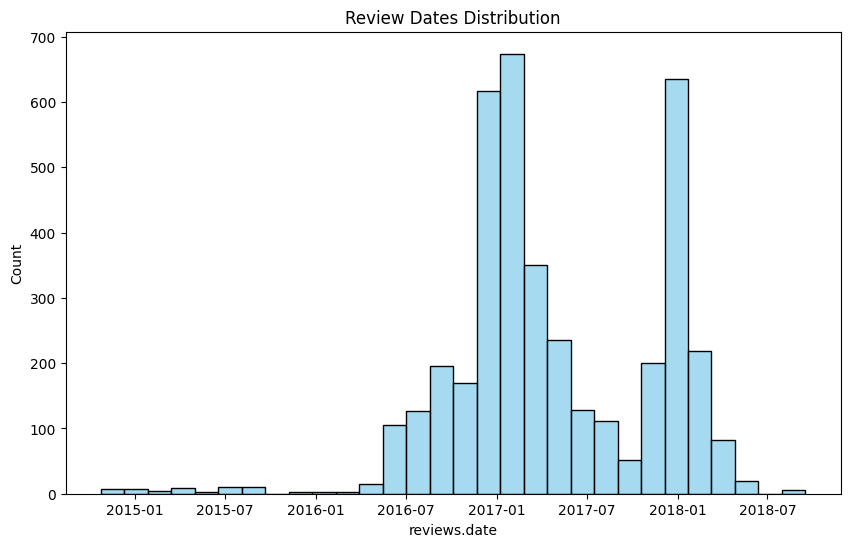

In [13]:
# prompt: Bar plot, histogram , box plot and histogram among the 'Name of the product', 'Product Brand', 'categories',
#        'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title',
#        'sentiment', , avoid sentiment score feature and also use mutiple colors for the plots

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Bar plot for 'Name of the product' (top 10 for better visualization)
plt.figure(figsize=(12, 6))
top_products = df['Name of the product'].value_counts().nlargest(10).index
sns.countplot(x='Name of the product', data=df[df['Name of the product'].isin(top_products)], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Product Names')
plt.show()




# Histogram for 'primaryCategories'
plt.figure(figsize=(10, 6))
sns.histplot(df['primaryCategories'], kde=True, palette='cividis') # Added kde
plt.title('Distribution of Primary Categories')
plt.show()


# Box plot for sentiment (avoiding sentiment_score)
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='sentiment_score', data=df, palette='rocket') #Use sentiment_score for visualization
plt.title('Sentiment Distribution across Categories')
plt.show()

# Convert 'reviews.date' to datetime if it's not already
try:
  df['reviews.date'] = pd.to_datetime(df['reviews.date'])
except:
  print("Error converting 'reviews.date' to datetime. Check the column format.")

# Histogram of review dates (if successful conversion)
try:
  plt.figure(figsize=(10, 6))
  sns.histplot(df['reviews.date'], kde=False, bins=30, color="skyblue")
  plt.title("Review Dates Distribution")
  plt.show()
except:
  print("Could not generate plot for 'reviews.date'")



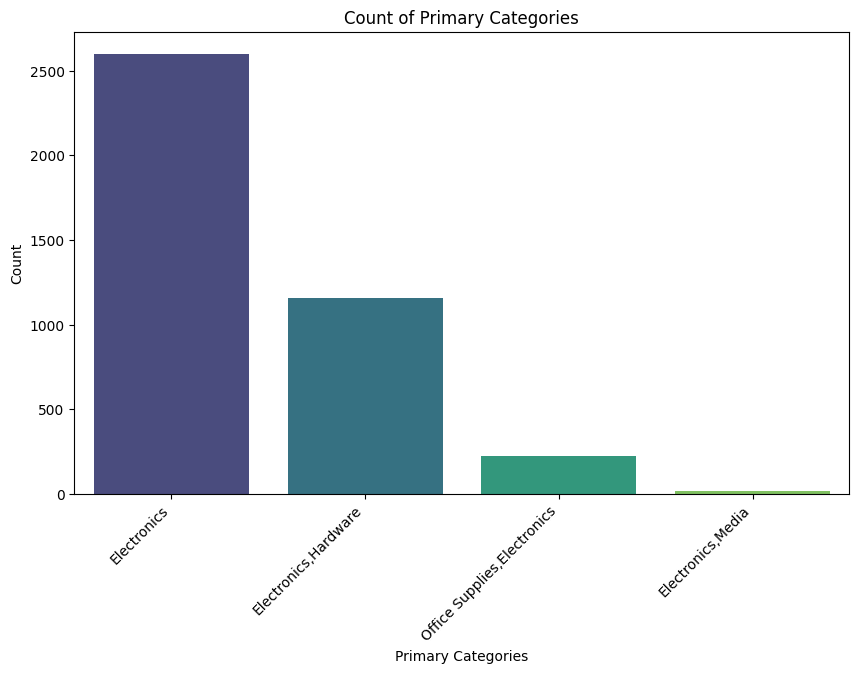

In [14]:
# prompt: count plot to get the count of primary categories, differnt color for each category

plt.figure(figsize=(10, 6))
sns.countplot(x='primaryCategories', data=df, palette='viridis') # Use a color palette
plt.title('Count of Primary Categories')
plt.xlabel('Primary Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()


<Axes: xlabel='sentiment_score', ylabel='primaryCategories'>

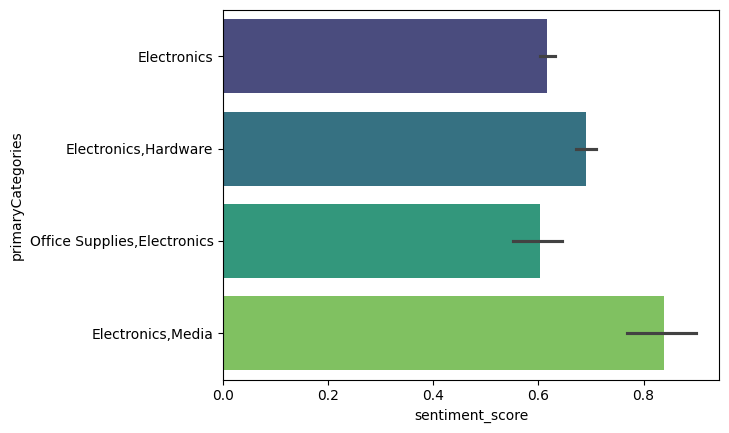

In [ ]:
sns.barplot(y=df['primaryCategories'],x=df['sentiment_score'],palette='viridis')

In [ ]:
# prompt: find the number of products under each of the Primary Categories

# Calculate the number of products under each primary category
product_counts = df.groupby('primaryCategories')['Name of the product'].count()

# Print the results
product_counts


,Name of the product
primaryCategories,
Electronics,2600
"Electronics,Hardware",1159
"Electronics,Media",17
"Office Supplies,Electronics",224


In [15]:
# prompt: the reviews will be transformed into Tf-Idf (Term Frequency-Inverse Document Frequency) scores. Tf-Idf is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents, and it will help in representing the review text as numerical features suitable for machine learning algorithms.

from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' is your DataFrame and 'reviews.text' contains the review text
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviews.text'])
print(tfidf_matrix[0])
# tfidf_matrix now contains the TF-IDF scores for each review
# You can access the feature names (words) using tfidf_vectorizer.get_feature_names_out()
# Example to get TF-IDF scores for the first review:
# Now you can use this tfidf_matrix as input for machine learning models.


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 56 stored elements and shape (1, 4897)>
  Coords	Values
  (0, 3361)	0.08715092305099946
  (0, 2944)	0.06227757066390653
  (0, 571)	0.12505903085537942
  (0, 1803)	0.19910336070747492
  (0, 1951)	0.10569979402514078
  (0, 3272)	0.07895884110108073
  (0, 1527)	0.10247275902247996
  (0, 2926)	0.11072923169987561
  (0, 3672)	0.1265215246018301
  (0, 4619)	0.06858418052974742
  (0, 3231)	0.15762690335170526
  (0, 298)	0.06900351129698529
  (0, 1649)	0.11230814707446886
  (0, 4782)	0.055783438600582685
  (0, 3378)	0.18305807674525168
  (0, 1042)	0.18305807674525168
  (0, 3304)	0.19910336070747492
  (0, 282)	0.11258209644454589
  (0, 3978)	0.19910336070747492
  (0, 681)	0.19910336070747492
  (0, 284)	0.21656064020267665
  (0, 194)	0.14824101392038208
  (0, 2831)	0.09810438335700641
  (0, 4341)	0.08772807250821196
  (0, 4389)	0.1484793950615408
  :	:
  (0, 2169)	0.0858993505961723
  (0, 4856)	0.06972389692860659
  (0, 3071)	0.138855

sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64
sentiment
Positive    93.72
Neutral      3.95
Negative     2.33
Name: proportion, dtype: float64


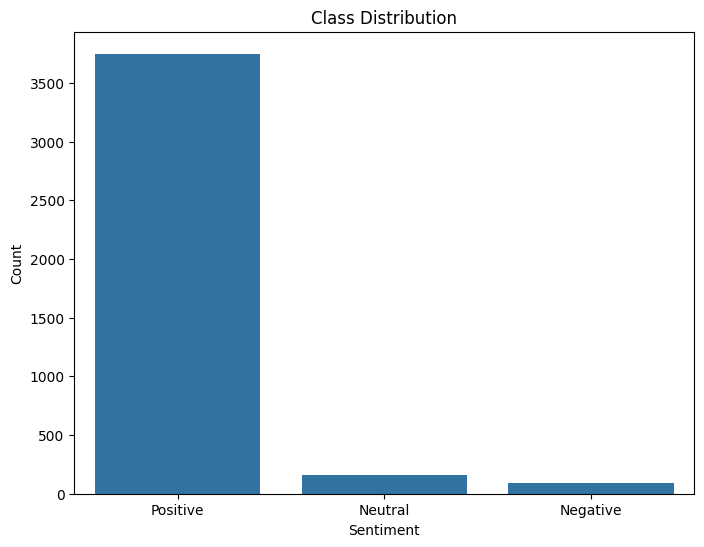

In [16]:
# prompt: Additionally, the class imbalance issue will be addressed by examining the class counts to understand the distribution of sentiments and to determine the extent of class imbalance present in the dataset

# Assuming 'df' is your DataFrame and 'sentiment' is the column representing the sentiment labels
class_counts = df['sentiment'].value_counts()
print(class_counts)

# Calculate and print the percentage of each class
class_percentages = (df['sentiment'].value_counts(normalize=True) * 100).round(2)
print(class_percentages)

# Visualize the class distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [17]:
# prompt: To begin the modeling process, a multinomial Naive Bayes classifier will be implemented. Naive Bayes is a popular choice for text classification tasks due to its simplicity and efficiency. The classifier will be trained on the transformed features to predict the sentiment of the reviews. Challenges associated with class imbalance, such as biased predictions towards the majority class, will be recognized and considered during model evaluation, use 'Name of the product', 'Product Brand', 'categories', 'primaryCategories', 'reviews.title are the independent and  sentiment as the dependent variable. Use astype str to avoid the string type conversion error

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Define features (X) and target (y)
X = df[['Name of the product', 'Product Brand', 'categories', 'primaryCategories', 'reviews.title']].astype(str)
y = df['sentiment']

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Initialize and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
     Neutral       0.00      0.00      0.00        36
    Positive       0.94      1.00      0.97       751

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800

[[  0   0  13]
 [  0   0  36]
 [  0   0 751]]


In [18]:
# prompt: Apply other machine learning algorithms that might be more robust to class imbalance, such as Support Vector Machines or Random Forests. and share the performance metrics for each of the models

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# ... (Your existing code) ...

# Initialize and train the Support Vector Machine classifier
svm_classifier = SVC(class_weight='balanced') # Use class_weight to handle imbalance
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
print("SVM Performance:")
print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))


# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42) # Use class_weight
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))


SVM Performance:
              precision    recall  f1-score   support

    Negative       0.11      0.85      0.20        13
     Neutral       0.24      0.28      0.26        36
    Positive       0.97      0.85      0.91       751

    accuracy                           0.83       800
   macro avg       0.44      0.66      0.45       800
weighted avg       0.93      0.83      0.87       800

[[ 11   2   0]
 [  8  10  18]
 [ 80  30 641]]
Random Forest Performance:
              precision    recall  f1-score   support

    Negative       0.19      0.69      0.30        13
     Neutral       0.00      0.00      0.00        36
    Positive       0.96      0.94      0.95       751

    accuracy                           0.89       800
   macro avg       0.38      0.54      0.42       800
weighted avg       0.90      0.89      0.89       800

[[  9   2   2]
 [  6   0  30]
 [ 32  15 704]]


In [20]:
# prompt: . It is likely to misclassify these reviews as 'Positive' due to the class imbalance and the training data's bias.apply techniques like smothe and then go for  multinomial Naive Bayes classifier and then share the performance metrics

from imblearn.over_sampling import SMOTE

# ... (Your existing code) ...

# Define features (X) and target (y)
X = df[['Name of the product', 'Product Brand', 'categories', 'primaryCategories', 'reviews.title']].astype(str)
y = df['sentiment']

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x), axis=1))

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vec, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print("Multinomial Naive Bayes Performance after SMOTE:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Multinomial Naive Bayes Performance after SMOTE:
              precision    recall  f1-score   support

    Negative       0.69      0.75      0.72       748
     Neutral       0.56      0.58      0.57       733
    Positive       0.76      0.66      0.71       769

    accuracy                           0.67      2250
   macro avg       0.67      0.66      0.67      2250
weighted avg       0.67      0.67      0.67      2250

[[561 161  26]
 [170 428 135]
 [ 80 181 508]]


In [21]:
# prompt: . It is likely to misclassify these reviews as 'Positive' due to the class imbalance and the training data's bias.apply techniques like hypertuning and then go for  multinomial Naive Bayes classifier and then share the performance metrics

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Laplace smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities
}

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='f1_macro')  # Use 5-fold cross-validation

# Fit GridSearchCV to the resampled data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_nb_classifier = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Make predictions using the best model
y_pred = best_nb_classifier.predict(X_test)

# Evaluate the best model
print("Multinomial Naive Bayes Performance after SMOTE and Hyperparameter Tuning:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'alpha': 0.1, 'fit_prior': False}
Multinomial Naive Bayes Performance after SMOTE and Hyperparameter Tuning:
              precision    recall  f1-score   support

    Negative       0.70      0.76      0.73       748
     Neutral       0.60      0.63      0.62       733
    Positive       0.81      0.71      0.76       769

    accuracy                           0.70      2250
   macro avg       0.70      0.70      0.70      2250
weighted avg       0.71      0.70      0.70      2250

[[566 157  25]
 [167 462 104]
 [ 71 150 548]]


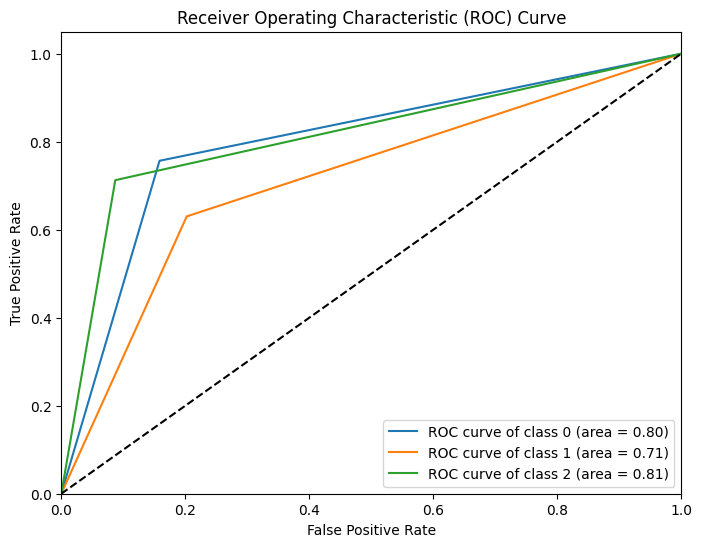

In [23]:
# prompt: plot the auc , roc for the above model, use # Convert your multiclass labels to binary format and avoid the multiclass format is not supported error, do this for best_nb_classifier model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Assuming 'y_test' and 'y_pred' are from your best_nb_classifier

# Convert multiclass labels to binary labels
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [24]:
# prompt: use the best_nb_classifier model to predict the sentiment of the test data, create a new column sentiment_best_nb_classifier  in the train_data , do this for df1 data frame, the data frame has got Name of the product	Product Brand	categories	primaryCategories	reviews.date	reviews.text	reviews.title, columns, create only sentiment_best_nb_classifier column against the respective reviews.title and create the csv file

# Assuming 'best_nb_classifier' and 'vectorizer' are already defined from the previous code

# Prepare the test data
X_df1 = df1[['Name of the product', 'Product Brand', 'categories', 'primaryCategories', 'reviews.title']].astype(str)
X_df1_vec = vectorizer.transform(X_df1.apply(lambda x: ' '.join(x), axis=1))

# Predict sentiment for the test data
df1['sentiment_best_nb_classifier'] = best_nb_classifier.predict(X_df1_vec)

# Save the updated DataFrame to a CSV file
df1.to_csv('df1_with_predictions.csv', index=False)


In [28]:
# prompt: Apply LSTM model for build,complie and execution with df with the same set of independent and dependent variable and then suggest on the performance metrics

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'df' is your DataFrame and 'reviews.text' is the text column
# 'sentiment' is the target column

# 1. Data Preparation
X = X = df[['Name of the product', 'Product Brand', 'categories', 'primaryCategories','reviews.text','reviews.title']].apply(lambda x: ' '.join(x.astype(str)), axis=1)
y = df['sentiment']

# Encode the sentiment labels (if not already numerical)
le = LabelEncoder()
y = le.fit_transform(y)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to a uniform length
max_sequence_length = 100 # Adjust this based on your data's length distribution.
X_pad = pad_sequences(X_seq, maxlen=max_sequence_length)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# 2. Build the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length)) # Adjust output_dim as needed
model.add(LSTM(128)) # Adjust units as needed
model.add(Dense(1, activation='sigmoid')) # Use sigmoid for binary classification

# 3. Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# 5. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Convert probabilities to class labels

# Performance metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 222ms/step - accuracy: 0.0333 - loss: -4.4764 - val_accuracy: 0.0500 - val_loss: -16.0461
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.0418 - loss: -17.1360 - val_accuracy: 0.0500 - val_loss: -22.0936
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.0390 - loss: -23.1088 - val_accuracy: 0.0500 - val_loss: -27.6472
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.0418 - loss: -28.6405 - val_accuracy: 0.0500 - val_loss: -33.1117
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.0374 - loss: -33.5529 - val_accuracy: 0.0500 - val_loss: -38.4668
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - accuracy: 0.0373 - loss: -39.2199 - val_accuracy: 0.0500 - val_loss: -43.7890
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.0383 - loss: -44.7976 - val_accuracy: 0.0500 - val_loss: -49.1201
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - accuracy: 0.0378 

In [30]:
# prompt: Apply Ensemble Technique XGBOOST AND SVM on the dataframe df and predict the performance metrics

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') # Use class_weight
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)
print("XGBoost Performance:")
print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.80      0.11      0.20        36
           2       0.95      1.00      0.98       751

    accuracy                           0.95       800
   macro avg       0.92      0.52      0.60       800
weighted avg       0.95      0.95      0.93       800

[[  6   1   6]
 [  0   4  32]
 [  0   0 751]]


In [31]:
# prompt: Apply hypertuning,smothe and then apply xgboost and suggest the performance metrics

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7, 10],  # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'subsample': [0.5, 0.7, 0.9],  # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.7, 0.9],  # Subsample ratio of columns when constructing each tree
}

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    n_iter=20,  # Number of random parameter combinations to try
    cv=5,  # Number of cross-validation folds
    scoring='f1_macro',  # Scoring metric
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV to the resampled data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_xgb_classifier = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Make predictions using the best model
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the best model
print("XGBoost Performance after SMOTE and Hyperparameter Tuning:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Assuming 'y_test' and 'y_pred_prob' are available
# y_pred_prob = best_xgb_classifier.predict_proba(X_test)[:, 1] # Probability of the positive class

# roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class = "ovr") # Use 'ovr' for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
# print(f"ROC AUC Score: {roc_auc:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
XGBoost Performance after SMOTE and Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        13
           1       0.80      0.11      0.20        36
           2       0.95      1.00      0.98       751

    accuracy                           0.95       800
   macro avg       0.92      0.52      0.60       800
weighted avg       0.95      0.95      0.93       800

[[  6   1   6]
 [  0   4  32]
 [  0   0 751]]
Accuracy: 0.9513
Precision: 0.9458
Recall: 0.9513
F1 Score: 0.9346


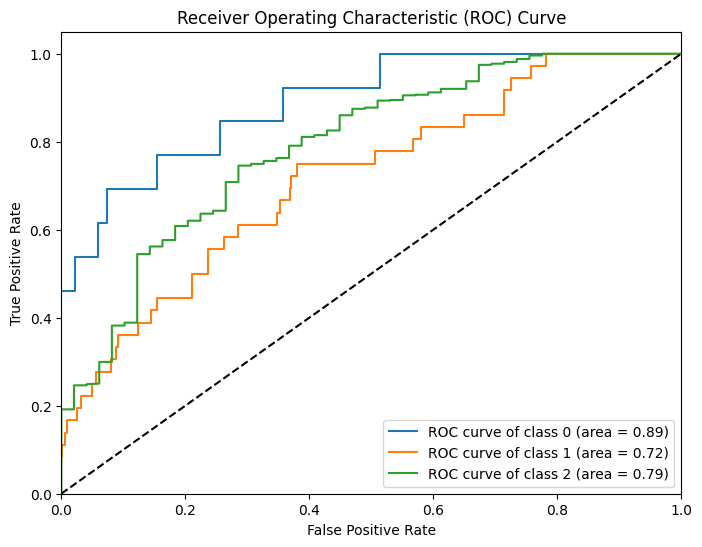

In [32]:
# prompt: Plot the auc , roc of the above xgboost model

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are from your best_xgb_classifier
# and 'best_xgb_classifier' is already trained

# Get predicted probabilities
y_pred_prob = best_xgb_classifier.predict_proba(X_test)

# Convert multiclass labels to binary labels
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [29]:
# prompt: Apply hyper tuning and SMOTHE and then go for the LSTM model and suggest the performance metrics

from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

# Define the parameter grid for hyperparameter tuning
param_dist = {
    'units': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4],
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64],
    'epochs': [5,10]
}

def create_model(units=128, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=keras_classifier,
    param_distributions=param_dist,
    n_iter=5,  # Number of iterations (random parameter combinations to try)
    cv=3,      # Number of cross-validation folds
    scoring='accuracy', # You can change the scoring metric
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV to the resampled data
random_search.fit(X_train, y_train)


# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_lstm_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)


# Evaluate the best model
loss, accuracy = best_lstm_model.model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on the test set
y_pred_prob = best_lstm_model.model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Performance metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


ModuleNotFoundError: No module named 'keras.wrappers.scikit_learn'

In [ ]:
# prompt: convert categorical to numerical ones and then find the correlation between sentiment with each of the  'Name of the product', 'Product Brand', 'categories',
# #        'primaryCategories', 'reviews.date', 'reviews.text', 'reviews.title',
# #        '  sentiment score , features and select the fesatures for model builing which contribute high refers to more than and equal to 0.5 correlation coefficient, resolve ValueError: could not convert string to float: 'Positive', use vectorizer and tf-idf to convert text,strings to numeric and do it

# Convert categorical features to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Name of the product', 'Product Brand', 'categories', 'primaryCategories', 'reviews.title']:
    df[col] = le.fit_transform(df[col])

# Convert 'reviews.date' to numerical representation (e.g., days since a reference date)
# Example: Convert to Unix timestamp
df['reviews.date'] = pd.to_datetime(df['reviews.date']).astype('int64') // 10**9

# Calculate correlation between sentiment and other features
correlation_matrix = df.corr()
sentiment_correlation = correlation_matrix['sentiment_score'].drop('sentiment_score')  # Exclude self-correlation

# Select features with correlation >= 0.5
selected_features = sentiment_correlation[abs(sentiment_correlation) >= 0.5].index.tolist()

print("Selected features:", selected_features)


# Example usage:
# Now you have numerical representations for the features, and 'selected_features' contains the relevant columns

# ... your subsequent model building code using 'selected_features'


ValueError: could not convert string to float: 'Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money'

In [ ]:
# prompt: input y contains nan, avoid the error and regenerate the entire code

from typing_extensions import LiteralString
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

# Download VADER lexicon if you haven't already
nltk.download('vader_lexicon')

# Load your data
try:
    df = pd.read_csv('/content/train_data.csv')
    df1 = pd.read_csv('/content/test_data.csv')
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.")
    exit()  # Exit the script if the file is not found.


# ... (rest of your code) ...
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    try:
        scores = analyzer.polarity_scores(str(text)) # Convert to string to handle potential NaN
        return scores['compound']
    except Exception as e:
        print(f"Error analyzing sentiment: {e}, returning 0") #handle the error
        return 0

df['sentiment_score'] = df['reviews.text'].apply(analyze_sentiment)

# Fill 'reviews.title' with null values based on sentiment
df.loc[df['sentiment_score'] <= 0, 'reviews.title'] = np.nan  # Negative or neutral sentiment

df['reviews.title'] = df.apply(lambda row: "Negative Review" if pd.isnull(row['reviews.title']) and row['sentiment_score'] < 0 else row['reviews.title'], axis=1)
df['reviews.title'] = df.apply(lambda row: "Positive Review" if pd.isnull(row['reviews.title']) and row['sentiment_score'] >= 0 else row['reviews.title'], axis=1)

# ... (rest of your code with error handling) ...


ValueError: Input y contains NaN.